# **MP6A - Generatory, Progowanie i Filtry**

# Obsługa błędów

Jeżeli podczas interpretacji kodu Python wystąpi błąd, wykonywanie programu zatrzyma się i zostanie zwrócony odpowiedni komunikat. Możemy się przed tym zabezpieczyć stosując konstrukcję *try/except*. Jeżeli wystąpi błąd w sekcji następującej po słowie kluczowym *try* (w tym przypadku próbujemy zmodyfikować zawartość zmiennej niemutowalnego typu *str*), wykonana zostanie sekcja następująca po *except*. W poniższym przykładzie komunikat towarzyszący błędowi przechowujemy dodatkowo w zmiennej *error*, który możemy wypisać na ekran:

In [ ]:
s = 'abc'
print(type(s))

try:
  s[2] = 'A'
except TypeError as error:
  print(f"Wystąpił błąd: {error}")

print('...ale program wykonuje się dalej')

<class 'str'>
Wystąpił błąd: 'str' object does not support item assignment
...ale program wykonuje się dalej


W sekcji *try* może znajdować się sekwencja instrukcji, ale dobrą praktyką jest zabezpieczanie w ten sposób jak najkrótszych kawałków kodu, optymalnie pojedynczych instrukcji, tak żeby precyzyjnie wyłapywać miejsce powstawania błędu.

Z tego samego powodu technicznie można, ale nie powinniśmy stosować słowa kluczowego *except* bez wskazania, którego konkretnie błędu powinien oczekiwać, przykładowo:



```
try:
  może_tu_jest_błąd()
  a_może_tutaj_kto_wie()
except:
  print("gdzieś wystąpił jakiś błąd")
```



# Zadanie na 3:

Korzystając z powyższej wiedzy, zabezpiecz się przed próbą utworzenia obiektu obrazka gdy w poniższym przykładzie wczytamy plik .txt.

W przypadku, gdy plik nie będzie prawidłowym obrazkiem, wypisz komunikat "Zły format pliku: " i podaj jego nazwę.

In [ ]:
# Zadanie na 3 - zmodyfikuj poniższy kod, tak aby zabezpieczyć go przed próbą wczytania plików .txt zamiast plików obrazka.

from google.colab import files
import cv2
from google.colab.patches import cv2_imshow

try:
  uploaded_files = files.upload()
  first_file = list(uploaded_files.keys())[0]
  if first_file.endswith(".txt"):
    raise(TypeError(f"Zły format pliku: {first_file}"))
  image = cv2.imread(first_file)
  cv2_imshow(image)
except TypeError as error:
  print(f"{error}")


Saving AA.txt to AA (3).txt
Zły format pliku: AA (3).txt


# Przekazywanie do funkcji zmiennej ilości argumentów

Jeżeli nasza funkcja ma przyjmować jeden lub więcej argumenty, ale nie wiemy dokładnie, ile ich może być, stosujemy notację z pojedynczą gwiazdką:


```
def funkcja(*argumenty: typ) -> zwracany_typ:
  ...
```

Poszczególne argumenty przekazywane są do funkcji jako kolejne elementy krotki (z ang.: *tuple*), i możemy się do nich dostać iterując po nich, lub indeksując konkretne elementy:


In [ ]:
def funkcja(*argumenty: str) -> None:
  print(argumenty)
  print(type(argumenty))
  print(argumenty[0])
  for numer, argument in enumerate(argumenty):
    print(f"Argument nr {numer}: {argumenty[numer]}")


funkcja("ala", "ma", "kota")

('ala', 'ma', 'kota')
<class 'tuple'>
ala
Argument nr 0: ala
Argument nr 1: ma
Argument nr 2: kota


# Generatory

Generatory w Pythonie to funkcje, które w efekcie swojego działania zwracają tzw. *iteratory*, czyli obiekty, przez których elementy możemy przechodzić sekwencyjnie.

Przykładem jest generator, który przyjmuje jako argument zmienną typu string, następnie udostępnia stringi wychwalające jej pojedyncze litery losowymi epitetami. W poniższym przykładzie importujemy typ Iterator, żeby zastosować go do wspomagania podpowiedzi zwracanych przez funkcję typów.

In [ ]:
from typing import Iterator
from random import choice


def propaganda(wejscie: str) -> Iterator[str]:

  lista_liter = list(wejscie)

  for litera in lista_liter:
    epitety = ["Cudowna", "Wspaniala", "Rewelacyjna"]
    pochwala = choice(epitety)
    yield f"{pochwala} litera {litera}"


obiekt = propaganda('Pies')

print(obiekt)

<generator object propaganda at 0x7dbb932245f0>


Jak widzimy przy próbie wypisania zwróconego przez funkcję obiektu, nie dostajemy pojedynczych elementów, są one spakowane i możemy przez nie przejść, np. pętlą *for*:

In [ ]:
for i in obiekt:
  print(i)

Wspaniala litera P
Wspaniala litera i
Cudowna litera e
Cudowna litera s


Jeżeli efekt działania generatora ma skończoną liczbę elementów, są one podawane są tylko raz. "Zużyty" iterator nie zwraca już nowych elementów. Jeżeli będziemy próbowali pobrać kolejny element iteratora za pomocą funkcji *next*, dostaniemy błąd *StopIteration*:



In [ ]:
try:
  print(next(obiekt))
except StopIteration:
  print("Empty")

Empty


Można jednakże stworzyć jego nową instancję (w poniższym przykładzie do poszczególnych elementów odwołujemy się pojedynczo, z sukcesem korzystając każdorazowo z funkcji *next*):

In [ ]:
obiekt = propaganda('Pies')

print(next(obiekt))
print(next(obiekt))
print(next(obiekt))
print(next(obiekt))

Wspaniala litera P
Wspaniala litera i
Rewelacyjna litera e
Cudowna litera s


Wywołując funkcję *next* możemy podać jej, jako drugi argument nienazwany, również parametr domyślny. Będzie od zwracany - zamiast błędu *StopIteration* - gdy iterator do którego się odwołujemy został już opróżniony z wartości.

In [ ]:
obiekt = propaganda('A')

print(next(obiekt, "Pustka"))
print(next(obiekt, "Pustka"))
print(next(obiekt, "Pustka"))

Rewelacyjna litera A
Pustka
Pustka


# Zadanie na 3.5

Funkcja *print* również przyjmuje więcej niż jeden argument. Ustawiając separator wypisywanych przez nią elementów na wartość "\n", wypisz cały stworzony wcześniej iterator korzystając z jednego polecenia print tak aby osiągnąć podobny efekt do powyższego (czyli każda pochwała w osobnej linii).

W razie potrzeby skorzystaj z dokumentacji: https://docs.python.org/3/library/functions.html?highlight=print#print

In [ ]:
obiekt = propaganda('Pies ')
print(*obiekt, sep="\n" )    # wstaw swoje rozwiązanie na 3.5 jako parametry funkcji print

Cudowna litera P
Rewelacyjna litera i
Wspaniala litera e
Wspaniala litera s
Cudowna litera  


# Zadanie na 4

Wykorzystując zebrane umiejętności, stwórz własny generator, który wczyta jeden lub więcej obrazków i zwróci iterator zwracający ich pomniejszone do rozmiarów 64x64 miniatury. Wyświetl wszystkie uzyskane miniatury iterując przez obiekt wynikowy.

Do zmiany rozmiaru skorzystaj z metody *.resize* wg poniższego przykładu:

```
dimensions = (64, 64)
resized_image = cv2.resize(source_image, dimensions)
cv2_imshow(resized_image)
```

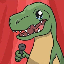


In [ ]:
def resize_image(file_paths, size):
    for path in file_paths:
        try:
            image = cv2.imread(path)
            if image is None:
                raise ValueError(f"File {path} is not a valid image.")
            resized_image = cv2.resize(image, size)
            yield resized_image
        except Exception as e:
            print(f"{e}")


Saving bggag.jpg to bggag.jpg
Saving agga.jpg to agga (8).jpg


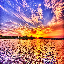

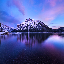

In [ ]:
# Zadanie na 4
uploaded_files = files.upload()
first_file = list(uploaded_files.keys())
resized_image = resize_image(first_file, (64, 64))

for img in resized_image:
    cv2_imshow(img)


